In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
bit_data = pd.read_csv('bitcoin_dataset.csv')
bit_data.head()

Date  btc_market_price  btc_total_bitcoins  btc_market_cap  \
0  2/17/2010               0.0           2043200.0             0.0   
1  2/18/2010               0.0           2054650.0             0.0   
2  2/19/2010               0.0           2063600.0             0.0   
3  2/20/2010               0.0           2074700.0             0.0   
4  2/21/2010               0.0           2085400.0             0.0   

   btc_trade_volume  btc_blocks_size  btc_avg_block_size  \
0               0.0              0.0            0.000235   
1               0.0              0.0            0.000241   
2               0.0              0.0            0.000228   
3               0.0              0.0            0.000218   
4               0.0              0.0            0.000234   

   btc_n_orphaned_blocks  btc_n_transactions_per_block  \
0                      0                           1.0   
1                      0                           1.0   
2                      0                           1.0   
3                      0                           1.0   
4                      0                           1.0   

   btc_median_confirmation_time  ...  btc_cost_per_transaction_percent  \
0                           0.0  ...                         31.781022   
1                           0.0  ...                        154.463801   
2                           0.0  ...                       1278.516635   
3                           0.0  ...                      22186.687990   
4                           0.0  ...                        689.179876   

   btc_cost_per_transaction  btc_n_unique_addresses  btc_n_transactions  \
0                       0.0                     241                 244   
1                       0.0                     234                 235   
2                       0.0                     185                 183   
3                       0.0                     224                 224   
4                       0.0                     218                 218   

   btc_n_transactions_total  btc_n_transactions_excluding_popular  \
0                     41240                                   244   
1                     41475                                   235   
2                     41658                                   183   
3                     41882                                   224   
4                     42100                                   218   

   btc_n_transactions_excluding_chains_longer_than_100  btc_output_volume  \
0                                                244             65173.13   
1                                                235             18911.74   
2                                                183              9749.98   
3                                                224             11150.03   
4                                                218             12266.83   

   btc_estimated_transaction_volume  btc_estimated_transaction_volume_usd  
0                           36500.0                                   0.0  
1                            7413.0                                   0.0  
2                             700.0                                   0.0  
3                              50.0                                   0.0  
4                            1553.0                                   0.0  

[5 rows x 24 columns]

In [3]:
bit_data.btc_market_price[1023]

13.6888

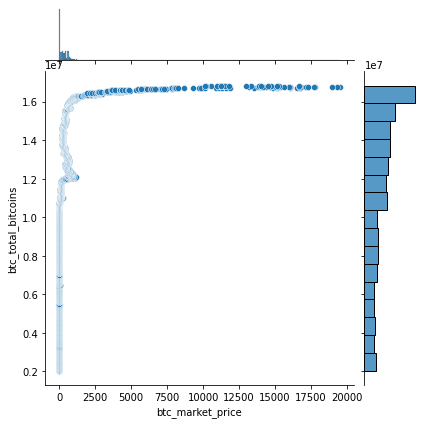

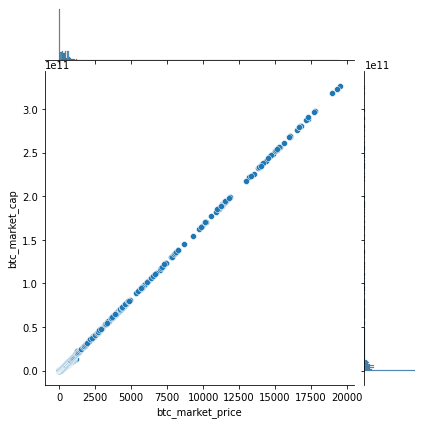

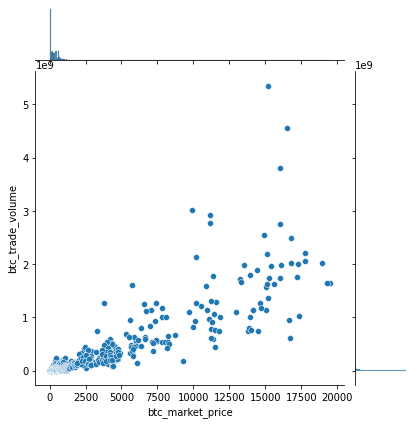

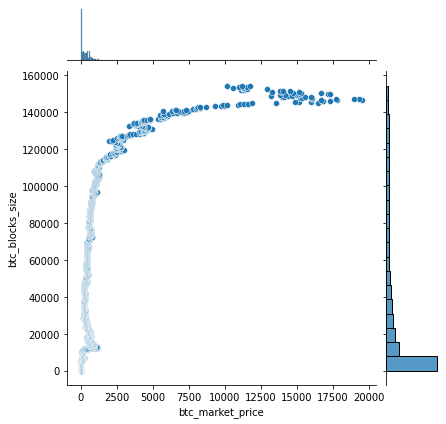

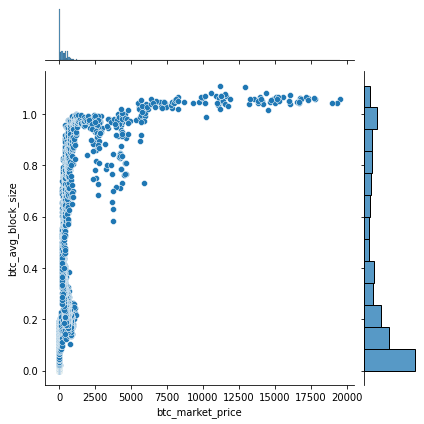

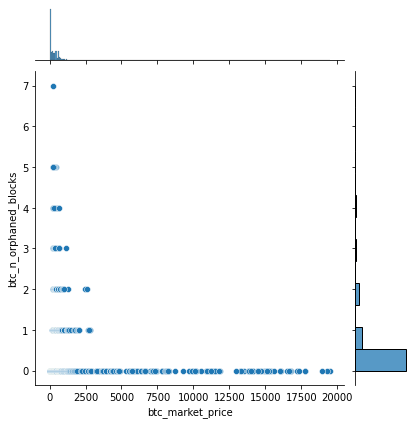

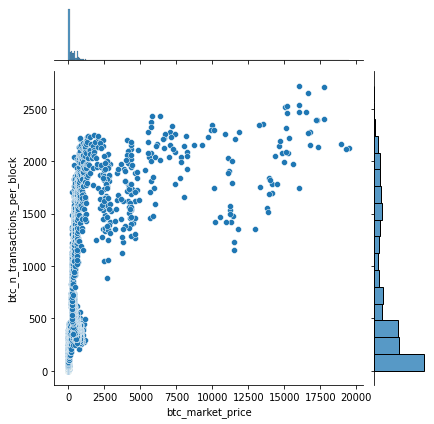

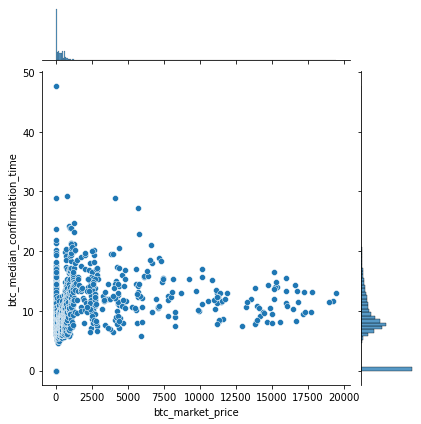

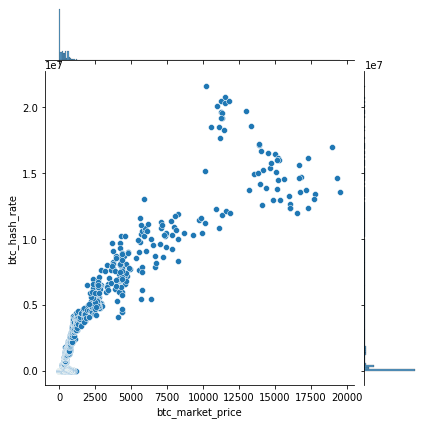

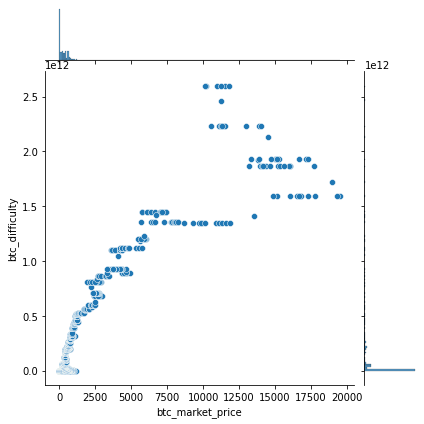

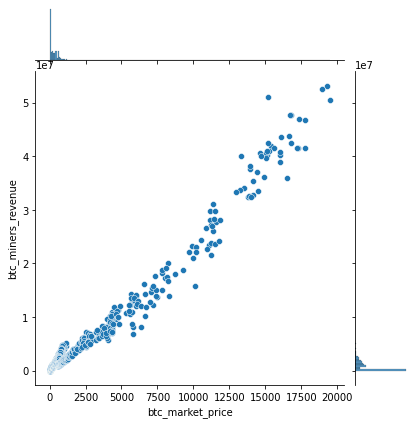

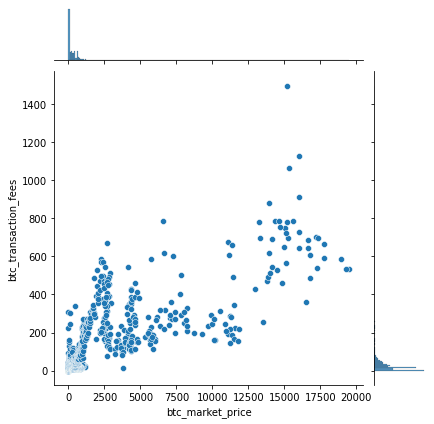

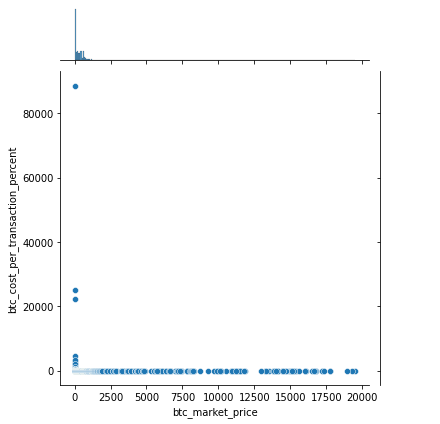

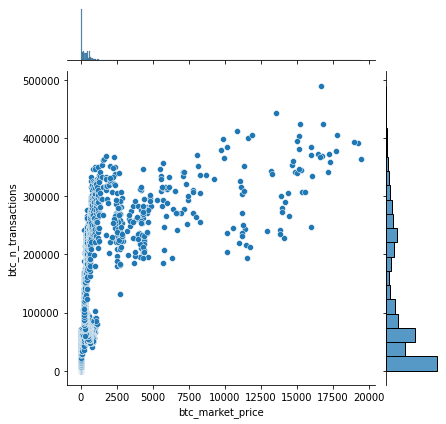

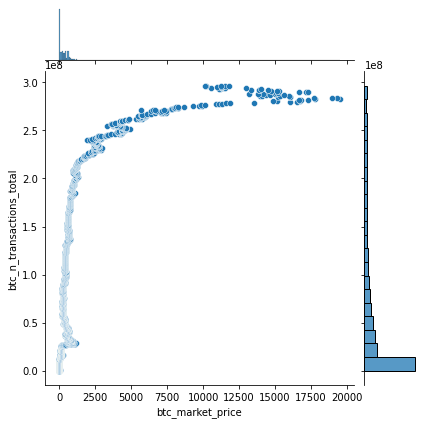

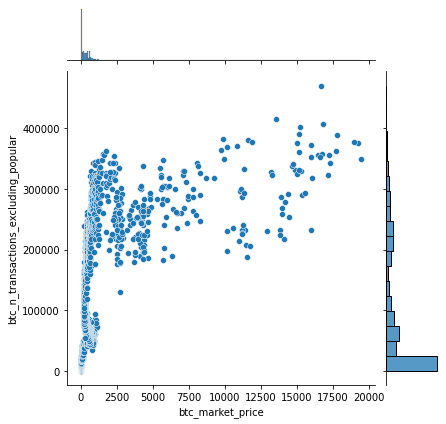

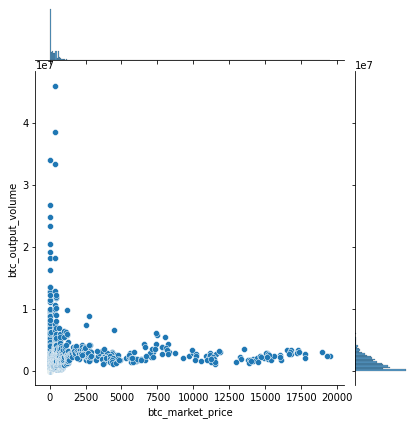

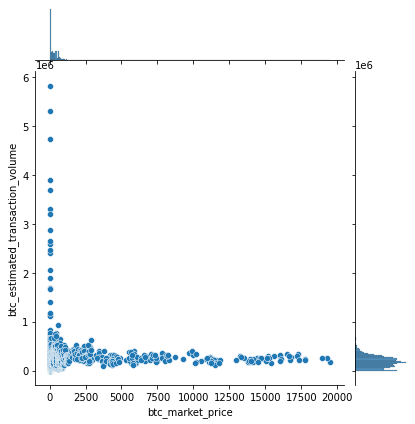

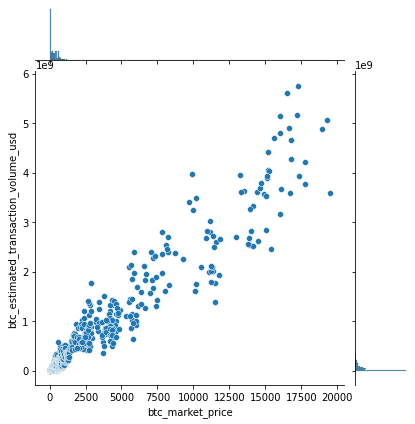

In [4]:
all_cols = bit_data.columns[2:]

for col in all_cols:
    sns.jointplot(data=bit_data, x='btc_market_price', y=col);
    plt.show()

In [4]:
bit_data = bit_data.fillna(0)

In [6]:
all_cols

Index(['btc_total_bitcoins', 'btc_market_cap', 'btc_trade_volume',
       'btc_blocks_size', 'btc_avg_block_size', 'btc_n_orphaned_blocks',
       'btc_n_transactions_per_block', 'btc_median_confirmation_time',
       'btc_hash_rate', 'btc_difficulty', 'btc_miners_revenue',
       'btc_transaction_fees', 'btc_cost_per_transaction_percent',
       'btc_cost_per_transaction', 'btc_n_unique_addresses',
       'btc_n_transactions', 'btc_n_transactions_total',
       'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'],
      dtype='object')

In [5]:
# INPUTS
# 1 btc_market_cap
# 2 btc_n_transactions
# 3 btc_miners_revenue
# 4 btc_cost_per_transaction
# 5 btc_difficulty
# 6 btc_hash_rate
# 7 btc_cost_per_transaction_percent

In [6]:
x_list = [bit_data.btc_market_cap, bit_data.btc_n_transactions, bit_data.btc_miners_revenue, bit_data.btc_cost_per_transaction, bit_data.btc_difficulty, bit_data.btc_hash_rate, bit_data.btc_cost_per_transaction_percent]
y_list = bit_data.btc_market_price

In [7]:
x = np.array(x_list).transpose()
x.shape

(2906, 7)

In [8]:
y = np.array(y_list)
y.shape

(2906,)

In [9]:
print(x)

[[0.00000000e+00 2.44000000e+02 0.00000000e+00 ... 2.52773821e+00
  2.92000000e-05 3.17810222e+01]
 [0.00000000e+00 2.35000000e+02 0.00000000e+00 ... 2.52773821e+00
  2.88000000e-05 1.54463801e+02]
 [0.00000000e+00 1.83000000e+02 0.00000000e+00 ... 2.52773821e+00
  2.25000000e-05 1.27851663e+03]
 ...
 [1.89000000e+11 2.32176000e+05 2.16516368e+07 ... 2.60000000e+12
  1.91511518e+07 1.24301173e+00]
 [1.71000000e+11 2.36609000e+05 2.21248740e+07 ... 2.60000000e+12
  2.16097456e+07 1.30114347e+00]
 [1.70000000e+11 2.04276000e+05 1.58405834e+07 ... 2.60000000e+12
  1.51397619e+07 1.01628408e+00]]


In [10]:
print(y)

[    0.          0.          0.      ... 11212.655   10184.06167
 10125.01333]


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [12]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [13]:
prediction = model.predict(x_test)

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
print('Mean squared error: %.2f' % mean_squared_error(y_test, prediction))

Mean squared error: 440.00


In [16]:
round(mean_squared_error(y_test, prediction))

440